<a href="https://colab.research.google.com/github/sindhusatish707/Multivariate-Regression/blob/regression_practice/Multivariate_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Run a multivariate regression of the returns of 1 risk asset on a factor model with 4 risk factors**

***We will be doing the following tasks in this practice project***


*   ***Import multiple data from pandas_datareader***
*   ***Merge them in such a way that we have a risk asset (Apple data used for this) and multiple risk factors.***

*   ***Cleanig data***
*   ***Regressing the risk asset on the risk factors with the help of an OLS model and noting the obervations***





*Importing*

Import libraries and collect data from Ken French's online research library which contains the returns of common risk factors

In [ ]:
import pandas_datareader as web
import matplotlib.pyplot as plt

In [ ]:
web.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

We will consider the following 2 datasets from famafrench to get the risk factors F-F_Research_Data_Factors and F-F_Momentum_Factors

Daily factors are far too noisy so we are using data over the months




In [ ]:
start = '1926-01-01'

In [ ]:
# Importing famafrench data

ff = web.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq='M', start=start).read()

In [ ]:
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.56 -2.43  0.22
 1926-08    2.64 -1.17  3.82  0.25
 1926-09    0.36 -1.40  0.13  0.23
 1926-10   -3.24 -0.09  0.70  0.32
 1926-11    2.53 -0.10 -0.51  0.31
 ...         ...   ...   ...   ...
 2023-01    6.65  5.02 -4.05  0.35
 2023-02   -2.58  1.21 -0.78  0.34
 2023-03    2.51 -5.59 -9.01  0.36
 2023-04    0.61 -3.34 -0.03  0.35
 2023-05    0.35  1.53 -7.80  0.36
 
 [1163 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.04  -4.54  3.12
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.70  11.67  4.75
 1930  -31.23  -5.17 -11.54  2.41
 1931  -45.11   3.70 -13.95  1.07
 ...      ...    ...    ...   ...
 2018   -6.95  -3.21  -9.73  1.83
 2019   28.28  -6.11 -10.34  2.15
 2020   23.66  13.18 -46.56  0.45
 2021   23.56  -3.89  25.53  0.04
 2022  -21.60  -6.82  25.81  1.43
 
 [96 rows x 4 columns],
 'DESCR': 'F-F Research Data Factors\n-----

We don't want the annual factors. So, let's extract just the first element from the above with monthly returns

In [ ]:
ff_df = ff[0]

Let's plot each series in the dataframe by itself

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

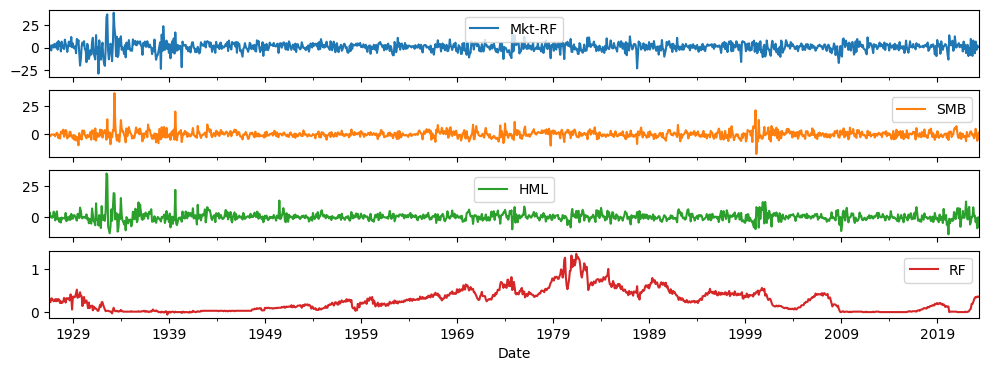

In [ ]:
ff_df.plot(subplots=True, figsize=(12,4))

Observe the noisy data. So, let's smooth it out by plotting the smooth moving averages using the roling method in pandas.

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

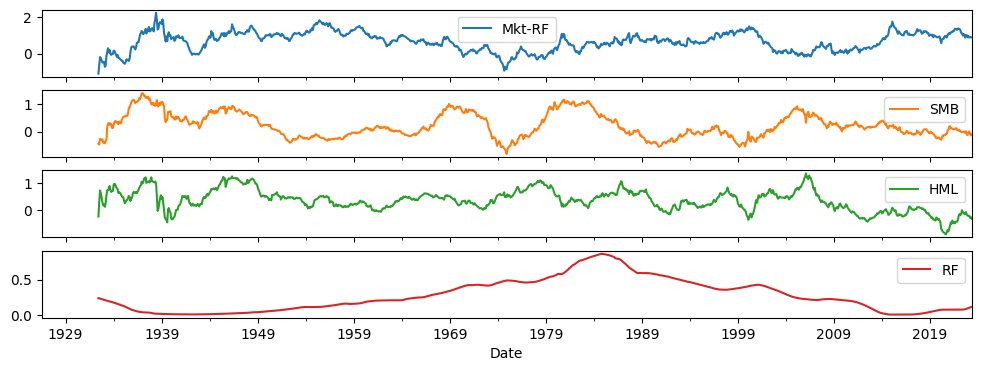

In [ ]:
ff_df.rolling(72).mean().plot(subplots=True, figsize=(12,4))

Let's include momentum factor

In [ ]:
ff_mom_df = web.famafrench.FamaFrenchReader('F-F_Momentum_Factor', freq='M', start=start).read()[0]

array([<Axes: xlabel='Date'>], dtype=object)

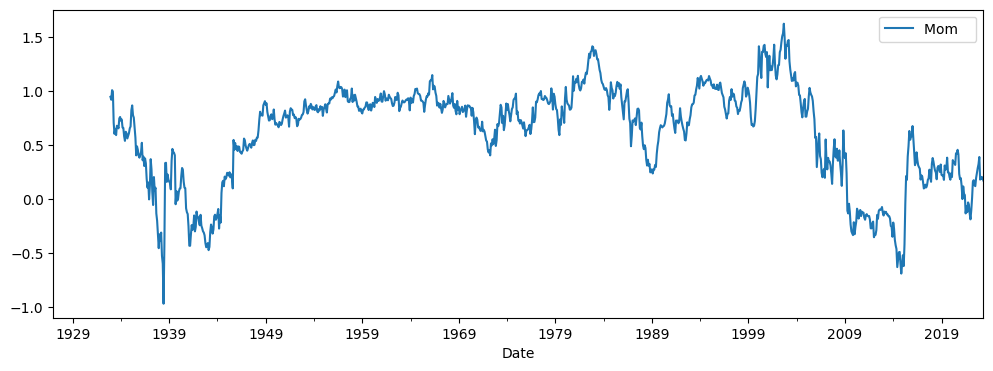

In [ ]:
ff_mom_df.rolling(72).mean().plot(subplots=True, figsize=(12,4))

*Merging dataframes together to get all the risk factors together in 1 dataframe*

Now we have a dataframe with 3 risk factors and another with 1 risk factor.

How can we combine this into 1 dataframe with 4 risk factors?

Pandas provides merge funtionality and let's use this on a common identifier to have a connectivity between the 2 dataframes that we want to merge. Here, let's do it by date.

In [ ]:
ff_df

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31
...,...,...,...,...
2023-01,6.65,5.02,-4.05,0.35
2023-02,-2.58,1.21,-0.78,0.34
2023-03,2.51,-5.59,-9.01,0.36


In [ ]:
ff_mom_df

,Mom
Date,
1927-01,0.36
1927-02,-2.14
1927-03,3.61
1927-04,4.30
1927-05,3.00
...,...
2023-01,-15.98
2023-02,0.21
2023-03,-2.50


In [ ]:
import pandas as pd

In [ ]:
# While mergin, we need to specify what is being merged onto what.
# So, let's merge ff_df onto ff_mom_df
# How do we want to merge it? We have multiple ways like inner joins, outer joins, left joins, right joins. Let's use inner merge - connect the data of both dataframes where the dates are common
# One-to-one merge makes sure that the date does not occur more than once in either of the dataframes. If it does, python will complain and let us know that something is wrong

ff_merged_df = pd.merge(ff_df, ff_mom_df, on='Date', how='inner', sort=True, copy=True, indicator=False, validate='one_to_one')

In [ ]:
# Merged dataframe

ff_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.37,4.54,0.25,0.36
1927-02,4.18,0.04,2.94,0.26,-2.14
1927-03,0.13,-1.65,-2.61,0.30,3.61
1927-04,0.46,0.30,0.81,0.25,4.30
1927-05,5.44,1.53,4.73,0.30,3.00
...,...,...,...,...,...
2023-01,6.65,5.02,-4.05,0.35,-15.98
2023-02,-2.58,1.21,-0.78,0.34,0.21
2023-03,2.51,-5.59,-9.01,0.36,-2.50


Let's get the data of the risk asset that we actually want to regress on these risk factors

Let's get data of Apple as the risk asset

In [ ]:
# to avoid TypeError: string indices must be integers when getting the data from yahoo
import yfinance as yfin


yfin.pdr_override()

In [ ]:
# Get the APPLE data from yahoo

appl_df = web.data.get_data_yahoo('AAPL', start=start)['Adj Close'].resample('M').ffill().pct_change()

[*********************100%***********************]  1 of 1 completed


In [ ]:
appl_df

Date
1980-12-31         NaN
1981-01-31   -0.172163
1981-02-28   -0.061943
1981-03-31   -0.075475
1981-04-30    0.158162
                ...   
2023-03-31    0.118649
2023-04-30    0.028987
2023-05-31    0.046058
2023-06-30    0.094330
2023-07-31   -0.017683
Freq: M, Name: Adj Close, Length: 512, dtype: float64

In [ ]:
# Convert it to a dataframe

AAPL_df = appl_df.to_frame()

In [ ]:
AAPL_df

,Adj Close
Date,
1980-12-31,NaN
1981-01-31,-0.172163
1981-02-28,-0.061943
1981-03-31,-0.075475
1981-04-30,0.158162
...,...
2023-03-31,0.118649
2023-04-30,0.028987
2023-05-31,0.046058


*Merging the Apple co. data, which holds the risk asset, with the dataframe holding the risk factors*

The starting dates are different for our previously merged df and AAPL df. So, let's again merge and get the dataframe for the overlapping dates without any repititions.

Another issue is that the data index for both these datarames are different. So, let's fix that as well as we cannot merge where the data types are different

In [ ]:
AAPL_df.index.dtype

dtype('<M8[ns]')

In [ ]:
ff_merged_df.index.dtype

period[M]

In [ ]:
AAPL_df['str_date'] = AAPL_df.index.astype(str)
AAPL_df['dt_date'] = pd.to_datetime(AAPL_df['str_date']).dt.strftime('%Y-%m')

In [ ]:
AAPL_df['dt_date'].dtype

dtype('O')

In [ ]:
ff_merged_df['str_date'] = ff_merged_df.index.astype(str)
ff_merged_df['dt_date'] = pd.to_datetime(ff_merged_df['str_date']).dt.strftime('%Y-%m')

In [ ]:
ff_merged_df['dt_date'].dtype

dtype('O')

In [ ]:
# Merging the previously merged dataframe and apple dataframe

AAPL_ff_merge_df = pd.merge(AAPL_df, ff_merged_df, on='dt_date', how='inner', sort=True, copy=True, indicator=False, validate='one_to_one')

In [ ]:
AAPL_ff_merge_df

,Adj Close,str_date_x,dt_date,Mkt-RF,SMB,HML,RF,Mom,str_date_y
0,NaN,1980-12-31,1980-12,-4.52,-0.26,2.79,1.31,-6.68,1980-12
1,-0.172163,1981-01-31,1981-01,-5.04,2.92,6.72,1.04,-7.95,1981-01
2,-0.061943,1981-02-28,1981-02,0.57,-0.34,1.02,1.07,-1.35,1981-02
3,-0.075475,1981-03-31,1981-03,3.56,3.54,0.64,1.21,0.74,1981-03
4,0.158162,1981-04-30,1981-04,-2.11,4.40,2.28,1.08,-0.91,1981-04
...,...,...,...,...,...,...,...,...,...
505,0.110521,2023-01-31,2023-01,6.65,5.02,-4.05,0.35,-15.98,2023-01
506,0.023183,2023-02-28,2023-02,-2.58,1.21,-0.78,0.34,0.21,2023-02
507,0.118649,2023-03-31,2023-03,2.51,-5.59,-9.01,0.36,-2.50,2023-03
508,0.028987,2023-04-30,2023-04,0.61,-3.34,-0.03,0.35,1.65,2023-04


*Cleaning data*

'str_date_x' and 'str_date_y' are the dates we got from both the dataframes that we don't require anymore. So. let's drop it and rename 'Adj Close' to something more meaningful

In [ ]:
# Dropping columns

AAPL_ff_merge_df.drop(columns=['str_date_x', 'str_date_y'], inplace=True)

In [ ]:
# Renaming columns

AAPL_ff_merge_df.rename(columns={'Adj Close' : 'AAPL'}, inplace=True)

In [ ]:
AAPL_ff_merge_df

,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom
0,NaN,1980-12,-4.52,-0.26,2.79,1.31,-6.68
1,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95
2,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35
3,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74
4,0.158162,1981-04,-2.11,4.40,2.28,1.08,-0.91
...,...,...,...,...,...,...,...
505,0.110521,2023-01,6.65,5.02,-4.05,0.35,-15.98
506,0.023183,2023-02,-2.58,1.21,-0.78,0.34,0.21
507,0.118649,2023-03,2.51,-5.59,-9.01,0.36,-2.50
508,0.028987,2023-04,0.61,-3.34,-0.03,0.35,1.65


Observe that the risk factors are in percentages while the Apple's adjusted close values are not. So, let's convert Apple returns to same units.

We also need to subtract the risk-free rate.

In [ ]:
AAPL_ff_merge_df['AAPL_RF'] = AAPL_ff_merge_df['AAPL']*100-AAPL_ff_merge_df['RF']

In [ ]:
AAPL_ff_merge_df

,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom,AAPL_RF
0,NaN,1980-12,-4.52,-0.26,2.79,1.31,-6.68,NaN
1,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95,-18.256315
2,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35,-7.264286
3,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74,-8.757514
4,0.158162,1981-04,-2.11,4.40,2.28,1.08,-0.91,14.736234
...,...,...,...,...,...,...,...,...
505,0.110521,2023-01,6.65,5.02,-4.05,0.35,-15.98,10.702102
506,0.023183,2023-02,-2.58,1.21,-0.78,0.34,0.21,1.978308
507,0.118649,2023-03,2.51,-5.59,-9.01,0.36,-2.50,11.504862
508,0.028987,2023-04,0.61,-3.34,-0.03,0.35,1.65,2.548723


In [ ]:
# Remove the NaN values by dropping the rows that have NaN vaues

AAPL_ff_merge_df.dropna(axis=0, inplace=True)
AAPL_ff_merge_df

,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom,AAPL_RF
1,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95,-18.256315
2,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35,-7.264286
3,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74,-8.757514
4,0.158162,1981-04,-2.11,4.40,2.28,1.08,-0.91,14.736234
5,0.167398,1981-05,0.11,2.00,-0.42,1.15,3.70,15.589845
...,...,...,...,...,...,...,...,...
505,0.110521,2023-01,6.65,5.02,-4.05,0.35,-15.98,10.702102
506,0.023183,2023-02,-2.58,1.21,-0.78,0.34,0.21,1.978308
507,0.118649,2023-03,2.51,-5.59,-9.01,0.36,-2.50,11.504862
508,0.028987,2023-04,0.61,-3.34,-0.03,0.35,1.65,2.548723


*Regression with OLS model*

In [ ]:
# Import ordinary least squares model for regression

from statsmodels.api import OLS

In [ ]:
# Model set up
# Our y vector is AAPL_RF whch is our dependant variable which we want to regress onto our 4 independant variables which are the 4 risk factors (x-vales - this is in the form of a matrix because we have multiple factors considered)

results = OLS(AAPL_ff_merge_df['AAPL_RF'], AAPL_ff_merge_df[['Mkt-RF', 'SMB', 'HML', 'Mom']], missing='drop').fit()

KeyError: ignored

In [ ]:
list(AAPL_ff_merge_df)

['AAPL', 'dt_date', 'Mkt-RF', 'SMB', 'HML', 'RF', 'Mom   ', 'AAPL_RF']

In [ ]:
# We can either run the above row with additional space with Mom as below
# results = OLS(AAPL_ff_merge_df['AAPL_RF'], AAPL_ff_merge_df[['Mkt-RF', 'SMB', 'HML', 'Mom   ']], missing='drop').fit()

# Or rename the column

AAPL_ff_merge_df.rename(columns={'Mom   ': 'Mom'}, inplace=True)
list(AAPL_ff_merge_df)

results = OLS(AAPL_ff_merge_df['AAPL_RF'], AAPL_ff_merge_df[['Mkt-RF', 'SMB', 'HML', 'Mom']], missing='drop').fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                AAPL_RF   R-squared (uncentered):                   0.292
Model:                            OLS   Adj. R-squared (uncentered):              0.287
Method:                 Least Squares   F-statistic:                              52.15
Date:                Fri, 14 Jul 2023   Prob (F-statistic):                    9.09e-37
Time:                        08:11:51   Log-Likelihood:                         -1940.1
No. Observations:                 509   AIC:                                      3888.
Df Residuals:                     505   BIC:                                      3905.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.2735      0.114     11.153      0.000       1.049       1.498
SMB            0.2242      0.170      1.317      0.189      -0.110       0.559
HML           -0.8231      0.163     -5.046      0.000      -1.144      -0.503
Mom           -0.0443      0.115     -0.385      0.700      -0.270       0.181
==============================================================================
Omnibus:                       15.638   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.137
Skew:                          -0.054   Prob(JB):                     6.37e-08
Kurtosis:                       4.245   Cond. No.                         1.86
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observe that we don't have an intercept. A factor model should always have an intercept.

Fix:
Factor dataframe with our risk asset (AAPL_ff_merge_df) should also include a 'constant' (alpha) which is included in a more user friendly platforms but python does not include it. So, unless we give it a command to include a column of 1s, it is not going to include a 'constant' in the OLS model. So, let's give it a column of 1s which is reuired in our X to run a regression with an intercept

In [ ]:
import statsmodels.tools

In [ ]:
# Adding a constant column

AAPL_ff_merge_df_c = statsmodels.tools.add_constant(AAPL_ff_merge_df, prepend=True)

In [ ]:
AAPL_ff_merge_df_c

,const,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom,AAPL_RF
1,1.0,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95,-18.256315
2,1.0,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35,-7.264286
3,1.0,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74,-8.757514
4,1.0,0.158162,1981-04,-2.11,4.40,2.28,1.08,-0.91,14.736234
5,1.0,0.167398,1981-05,0.11,2.00,-0.42,1.15,3.70,15.589845
...,...,...,...,...,...,...,...,...,...
505,1.0,0.110521,2023-01,6.65,5.02,-4.05,0.35,-15.98,10.702102
506,1.0,0.023183,2023-02,-2.58,1.21,-0.78,0.34,0.21,1.978308
507,1.0,0.118649,2023-03,2.51,-5.59,-9.01,0.36,-2.50,11.504862
508,1.0,0.028987,2023-04,0.61,-3.34,-0.03,0.35,1.65,2.548723


In [ ]:
# Let's include const to our X

results = OLS(AAPL_ff_merge_df_c['AAPL_RF'], AAPL_ff_merge_df_c[['const', 'Mkt-RF', 'SMB', 'HML', 'Mom']], missing='drop').fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AAPL_RF   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     50.76
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           6.59e-36
Time:                        08:22:45   Log-Likelihood:                -1936.1
No. Observations:                 509   AIC:                             3882.
Df Residuals:                     504   BIC:                             3903.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4253      0.499      2.856      0.004       0.445       2.406
Mkt-RF         1.2085      0.116     10.450      0.000       0.981       1.436
SMB            0.2199      0.169      1.301      0.194      -0.112       0.552
HML           -0.8911      0.164     -5.443      0.000      -1.213      -0.569
Mom           -0.1006      0.116     -0.869      0.385      -0.328       0.127
==============================================================================
Omnibus:                       14.918   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               30.824
Skew:                          -0.052   Prob(JB):                     2.03e-07
Kurtosis:                       4.201   Cond. No.                         5.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations:
1. We have an alpha (const) as a proper factor model should and has a positive value and highly significant, about 1.4% per month
2. It has significant exposure (beta) of 1.2 on the market
3. It has insignificant exposure to size (SMB)
4. It has a negative significant exposure to value (HML)
5. It has insignificant exposure to momentum (Mom)
6. Overall, we have 28% of variability (R-Squared) in Apple's returns suggesting that there is actually a fairly big idiosyncrartic component.